In [32]:
# Copyright (c) Microsoft Corporation. All rights reserved.
# Licensed under the MIT License.

### Exploring BankNote-Net Embedding

The dataset consists of a dataframe of embeddings which contains over 24,000 embeddings of banknotes in accesibility usage scenarios. The dataframe is available in *csv* and *feather* formats. Each row in the dataset is a different **1x256** embedding, and also includes the corresponding currency, denomination and orientation (front and back) labels.

### Install dependencies

In [ ]:
pip install pandas==1.4.2 pyarrow==8.0.0 sklearn==0.0 matplotlib==3.5.1 seaborn==0.11.2

### Import libraries

In [26]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

### Load & Explore Data

In [27]:
# Load data, either .csv or .feather
data_df = pd.read_csv("https://raw.githubusercontent.com/microsoft/banknote-net/main/data/banknote_net.csv", index_col=0)
data_df_feather = pd.read_feather("https://raw.githubusercontent.com/microsoft/banknote-net/main/data/banknote_net.feather") # feather is faster and more robust that csv.

# Total numbe of images
print(f"Total number of images is {len(data_df)}")

# Unique number of currencies
print(f"Total number of currencies is {len(data_df.Currency.unique())}")

# Unique number of denominations (including back and front of each banknote)
combined_series = data_df.Currency + data_df.Denomination # combination of currency and denomination
print(f"Total number of denominations is {int(len(combined_series.unique()) / 2)}")

# Inspect data structure
data_df.head(10)

Total number of images is 24826
Total number of currencies is 17
Total number of denominations is 112


,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,...,v_248,v_249,v_250,v_251,v_252,v_253,v_254,v_255,Currency,Denomination
0,0.000000,0.802783,4.799193,3.520272,3.906448,2.964886,2.276473,0.472117,0.000000,0.351116,...,0.319955,5.005167,5.144637,0.000000,0.717125,0.0,4.724614,0.000000,AUD,100_1
1,1.282011,0.169436,4.367540,4.476254,5.645983,2.173897,0.638572,0.000000,0.149849,0.516939,...,0.671412,4.548221,2.671707,0.000000,0.317925,0.0,2.648906,0.656381,AUD,100_1
2,1.956406,0.000000,5.244660,3.611655,5.085964,3.766434,0.000000,1.865016,2.853455,1.840774,...,0.434040,6.429610,2.465012,0.000000,0.197883,0.0,0.823947,1.539916,AUD,100_1
3,0.382722,3.727718,4.409414,3.093557,6.277169,0.000000,1.368437,0.000000,1.095514,0.958835,...,2.279172,4.439319,0.273129,0.438889,2.423372,0.0,1.724243,0.000000,AUD,100_1
4,0.619588,0.071276,3.780865,3.637381,4.144943,3.829269,0.811821,0.387360,1.005720,1.084254,...,0.000000,6.559031,4.807416,0.017139,0.000000,0.0,2.969594,0.000000,AUD,100_1
5,0.078776,0.644733,2.710341,2.106869,3.037229,4.366678,0.802116,1.219890,1.602621,0.842361,...,0.575059,5.737626,3.718403,0.000000,0.351575,0.0,3.243896,0.000000,AUD,100_1
6,1.471466,0.000000,2.497013,2.721815,3.963496,4.339762,0.898919,1.321742,0.673099,0.845716,...,0.000000,4.615301,3.797620,0.044359,0.000000,0.0,3.043229,0.000000,AUD,100_1
7,1.040910,0.000000,4.119106,4.077905,3.483957,2.926373,0.000000,0.000000,1.758486,1.922651,...,1.237029,7.756765,2.139086,0.000000,1.238276,0.0,3.162983,0.043580,AUD,100_1
8,0.000000,0.408692,3.717778,3.311307,2.718847,2.629820,0.877763,0.296808,1.738931,0.335870,...,1.537544,6.442374,2.173676,0.000000,1.171402,0.0,3.257974,0.000000,AUD,100_1
9,0.225071,0.611859,3.646192,1.171887,2.443441,4.118752,0.973302,0.642363,1.496193,0.830227,...,0.639099,6.434539,3.712054,0.000000,0.540613,0.0,1.862063,0.000000,AUD,100_1


Each row correspond to a single image embedding with 256 columns and two columns for labels of currency and denomination + orientation. For example we interpret the label for the first images as a front image ("_1" in **Denomination** column) of a 100 (**Denomination** column) Australian Dollar ("AUD" in the **Currency** column) banknote:

In [28]:
data_df[['Currency', 'Denomination']].head(1)

,Currency,Denomination
0,AUD,100_1


This first images has the following embedding vector:

In [ ]:
data_df.iloc[0,:-2].values

#### Exploring reprentations

Let's visualize the representations for some currencies as t-SNE embeddings:

In [30]:
# Choose certain currencies for easier visualization
embedding = data_df.copy(deep=True)
embedding = embedding[
    (embedding["Currency"] == "AUD")
    | (embedding["Currency"] == "USD")
    | (embedding["Currency"] == "EUR")
    | (embedding["Currency"] == "BRL")
    | (embedding["Currency"] == "TRY")
]

# Save currency labels and separate labels from embeddings
labels = embedding["Currency"]
embedding = embedding.drop(["Currency", "Denomination"], axis=1)

# Train t-SNE embedding
X = TSNE(n_components=2, perplexity=20.0, n_iter=1000).fit_transform(embedding) # compute t-SNE representation


Let's plot the embeddings now, the images should cluster nicely

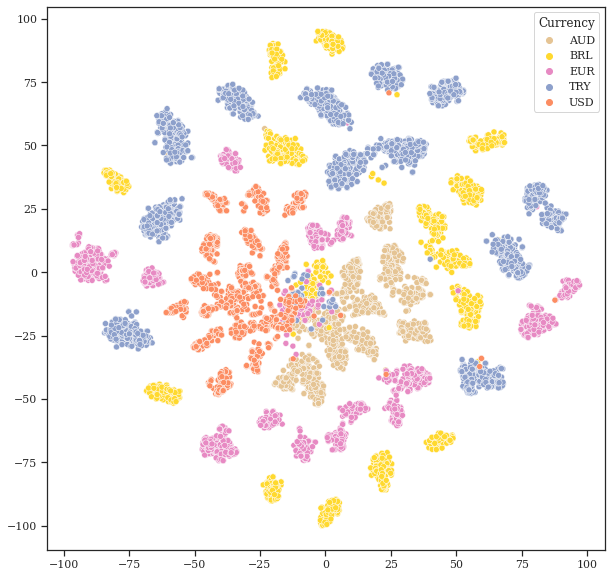

In [31]:
# Make plots
sns.set(font="serif", style="ticks", rc={"figure.figsize": (10, 10)}, context="notebook")
sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=labels,
    palette="Set2_r",
)
# Save figure
plt.savefig('embedding_vis.png', dpi=300)